In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

# get data 

In [2]:
cd ..

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week7


In [3]:
ls

Datasources/               gnod_2nd_prototype.jpg
MVP_flowchart_eg.pdf       readme.md
example_py_modularisation/ sians_notebooks/
gnod_1st_iteration.jpg


In [4]:
cd Datasources/

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week7/Datasources


In [5]:
ls

Spotify-2000.csv  code.html         geography.txt
USArrests.csv     dormouse.html


In [22]:
arrests=pd.read_csv('USArrests.csv')

In [23]:
arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Explore EDA of arrests 

In [11]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [12]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


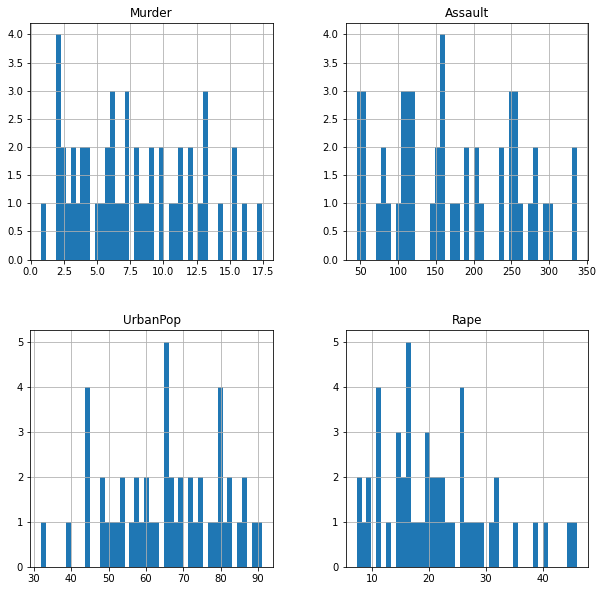

In [14]:
arrests.hist(bins=45, figsize=(10,10));

# prepare for K Means 

- everything must be numerical 
- ideally similar scales for all features 

In [24]:
# move first column to index 

arrests.index=arrests.iloc[:,0] # move 1st column to index

In [25]:
arrests=arrests.iloc[:,1:5] # keep only value columns

iloc= index location 
select by index position 
0 ... 

iloc [ rows, columns ] 

In [27]:
arrests.rename_axis(None,inplace=True) #delete extra header index 

In [28]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


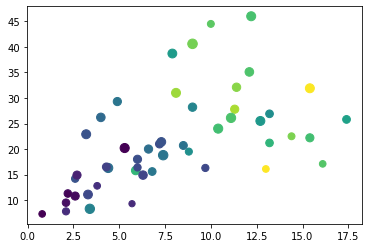

In [29]:
plt.scatter(arrests.iloc[:,0],arrests.iloc[:,3],arrests.iloc[:,2],arrests.iloc[:,1]); # x, y, size, colour

# lets try the cluster 

In [104]:
kmeans=KMeans(n_clusters=7, random_state=5)

In [105]:
cluster=kmeans.fit(arrests)

In [106]:
cluster.cluster_centers_

array([[  5.75      , 156.75      ,  74.        ,  19.4       ],
       [ 12.975     , 271.5       ,  52.5       ,  29.05      ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.1625    , 251.125     ,  76.375     ,  28.875     ],
       [ 11.95      , 316.5       ,  68.        ,  26.7       ],
       [ 11.5       , 195.33333333,  66.16666667,  27.43333333]])

In [107]:
cluster.labels_

array([4, 1, 5, 6, 4, 6, 3, 4, 5, 6, 2, 3, 4, 3, 2, 3, 3, 4, 2, 5, 0, 4,
       2, 1, 6, 3, 3, 4, 2, 0, 1, 4, 5, 2, 3, 0, 0, 3, 0, 1, 2, 6, 6, 3,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [35]:
arrests['cluster']=cluster.labels_

In [36]:
arrests.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,5
Arkansas,8.8,190,50,19.5,6
California,9.0,276,91,40.6,4


In [37]:
arrests['cluster'].value_counts()

3    10
2    10
4     8
0     8
6     6
1     4
5     4
Name: cluster, dtype: int64

# visualisation 

In [15]:
import plotly.graph_objs as go

In [39]:
arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', 'cluster'], dtype='object')

In [40]:
markersize= arrests['UrbanPop']
markercolour= arrests['cluster']

fig1=go.Scatter3d(x=arrests['Murder'],
                  y=arrests['Rape'],
                  z=arrests['Assault'],
                 marker=dict (size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Blues'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="Murder"),
                              yaxis=dict(title='Rape'),
                              zaxis=dict(title='Assault')))

In [44]:
import plotly

In [45]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

# scale before clustering 

In [46]:
# drop cluster 
arrests.drop(['cluster'], axis = 1, inplace = True) 

In [48]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(arrests)

MinMaxScaler()

In [63]:
scaled_arrests=scaler.transform(arrests)

In [64]:
arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

## turn this scaled array back into DF 

In [65]:
scaled_arrests_df=pd.DataFrame(scaled_arrests,columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])

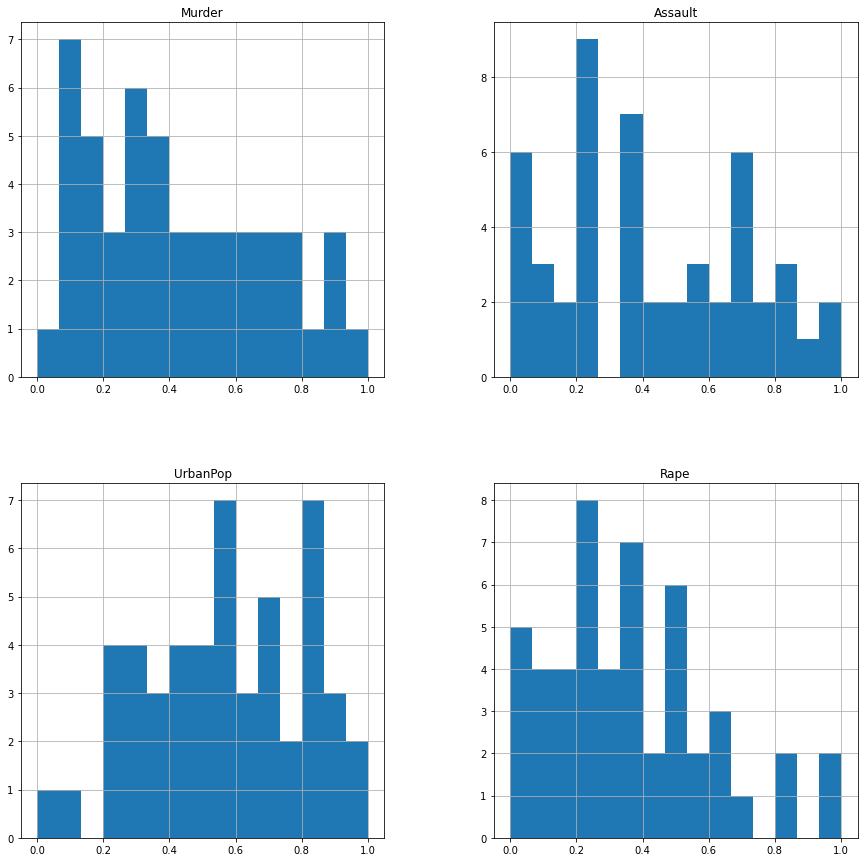

In [66]:
scaled_arrests_df.hist(bins=15,figsize=(15,15));

# re apply clustering 

In [89]:
kmeans=KMeans(n_clusters=7, random_state=5)

In [67]:
cluster_scaled=kmeans.fit(scaled_arrests_df)

In [103]:
scaled_arrests_df

,Murder,Assault,UrbanPop,Rape,cluster_scaled
0,0.746988,0.654110,0.440678,0.359173,6
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,4
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,2
5,0.427711,0.544521,0.779661,0.811370,2
6,0.150602,0.222603,0.762712,0.098191,5
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,4
9,1.000000,0.568493,0.474576,0.478036,6


In [68]:
cluster_scaled.cluster_centers_

array([[0.11370482, 0.09246575, 0.25847458, 0.08074935],
       [0.3939759 , 0.38150685, 0.50847458, 0.33540052],
       [0.5686747 , 0.70205479, 0.71864407, 0.87028424],
       [0.25301205, 0.2925636 , 0.84261501, 0.30638612],
       [0.64371773, 0.78424658, 0.77966102, 0.54374308],
       [0.20481928, 0.16438356, 0.61299435, 0.18260121],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388]])

In [69]:
cluster_scaled.labels_

array([6, 2, 4, 1, 2, 2, 5, 1, 4, 6, 3, 0, 4, 1, 0, 5, 1, 6, 0, 4, 3, 2,
       5, 6, 1, 1, 5, 2, 0, 3, 4, 4, 6, 0, 3, 1, 1, 5, 3, 6, 0, 6, 4, 3,
       0, 1, 3, 0, 5, 1], dtype=int32)

In [70]:
scaled_arrests_df['cluster_scaled']=cluster_scaled.labels_

In [71]:
scaled_arrests_df['cluster_scaled'].value_counts()

1    10
0     8
6     7
4     7
3     7
5     6
2     5
Name: cluster_scaled, dtype: int64

In [77]:
markercolour= scaled_arrests_df['cluster_scaled']

fig1=go.Scatter3d(x=scaled_arrests_df['Murder'],
                  y=scaled_arrests_df['Rape'],
                  z=scaled_arrests_df['Assault'],
                 marker=dict (color=markercolour,
                              opacity=0.9,
                              colorscale='Blues'),
                 line=dict (width=0.000002),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="Murder"),
                              yaxis=dict(title='Rape'),
                              zaxis=dict(title='Assault')))

In [78]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

# your challenge - using the music collection, work through the steps to 

- select numerical features 
- scale 
- run kmeans clustering (pick a suitable number of clusters)
- add the cluster back into the data set 
- review how many songs are in each cluster 

In [79]:
music=pd.read_csv('dandbplaylistaudio.csv')

In [80]:
music

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.530,0.944,11,-3.863,1,0.0844,0.000057,0.8560,0.3940,0.487,169.778,audio_features,29rrJBtcsOk3IjLfe5YUHI,spotify:track:29rrJBtcsOk3IjLfe5YUHI,https://api.spotify.com/v1/tracks/29rrJBtcsOk3...,https://api.spotify.com/v1/audio-analysis/29rr...,542933,4
1,1,0.795,0.592,10,-8.365,0,0.2550,0.002040,0.9460,0.0531,0.660,169.826,audio_features,5aHkhW2AgKCsvgYyqLxkrh,spotify:track:5aHkhW2AgKCsvgYyqLxkrh,https://api.spotify.com/v1/tracks/5aHkhW2AgKCs...,https://api.spotify.com/v1/audio-analysis/5aHk...,513280,4
2,2,0.651,0.932,8,-6.459,0,0.0686,0.012500,0.4260,0.2120,0.966,174.008,audio_features,2EiazSYyCSlBEKED2EvysD,spotify:track:2EiazSYyCSlBEKED2EvysD,https://api.spotify.com/v1/tracks/2EiazSYyCSlB...,https://api.spotify.com/v1/audio-analysis/2Eia...,329747,4
3,3,0.652,0.770,6,-10.258,1,0.0581,0.045400,0.8720,0.4390,0.518,159.823,audio_features,1ibPuHidlhfxG7O3AGSeGi,spotify:track:1ibPuHidlhfxG7O3AGSeGi,https://api.spotify.com/v1/tracks/1ibPuHidlhfx...,https://api.spotify.com/v1/audio-analysis/1ibP...,280973,4
4,4,0.669,0.753,2,-10.387,1,0.2240,0.018600,0.0425,0.4790,0.446,163.882,audio_features,4G2xz6VoK77bXvZePb9wAZ,spotify:track:4G2xz6VoK77bXvZePb9wAZ,https://api.spotify.com/v1/tracks/4G2xz6VoK77b...,https://api.spotify.com/v1/audio-analysis/4G2x...,387733,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,306,0.669,0.851,1,-5.075,1,0.0473,0.010600,0.8620,0.3080,0.945,163.389,audio_features,6tW3U7obAotfcyPruXdpM4,spotify:track:6tW3U7obAotfcyPruXdpM4,https://api.spotify.com/v1/tracks/6tW3U7obAotf...,https://api.spotify.com/v1/audio-analysis/6tW3...,230333,4
307,307,0.624,0.992,7,-5.796,0,0.1290,0.011200,0.8940,0.5430,0.882,169.877,audio_features,0iONLeOXEQkEIvJPgq7nRP,spotify:track:0iONLeOXEQkEIvJPgq7nRP,https://api.spotify.com/v1/tracks/0iONLeOXEQkE...,https://api.spotify.com/v1/audio-analysis/0iON...,386227,4
308,308,0.722,0.824,10,-5.990,0,0.1610,0.034800,0.3140,0.5620,0.239,164.982,audio_features,3MUmAutzgY4mZSBJJ1g57o,spotify:track:3MUmAutzgY4mZSBJJ1g57o,https://api.spotify.com/v1/tracks/3MUmAutzgY4m...,https://api.spotify.com/v1/audio-analysis/3MUm...,302907,4
309,309,0.686,0.695,4,-12.363,0,0.1490,0.001750,0.4450,0.0831,0.219,84.907,audio_features,1mG1BBKaxUrWtLDpZKyaCJ,spotify:track:1mG1BBKaxUrWtLDpZKyaCJ,https://api.spotify.com/v1/tracks/1mG1BBKaxUrW...,https://api.spotify.com/v1/audio-analysis/1mG1...,342007,4


# pick the right number of clusters 

In [81]:
cluster_scaled.inertia_

2.609287188338271

In [82]:
K=range(3,15) # whats the range of k that makes sense for your data ? 
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(scaled_arrests_df)
    inertia.append(kmeans.inertia_)

In [83]:
import numpy as np 

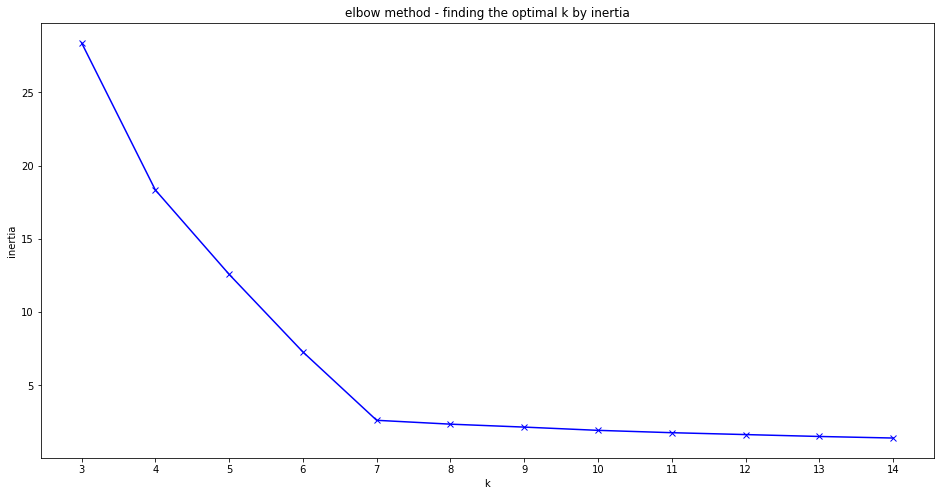

In [88]:
#plot the inertia: 
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method - finding the optimal k by inertia');

In [90]:
from sklearn.metrics import silhouette_score

In [92]:
K=range(3,9) # whats the range of k that makes sense for your data ? 
silhouettes=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(scaled_arrests_df)
    silhouettes.append(silhouette_score(scaled_arrests_df,kmeans.predict(scaled_arrests_df)))

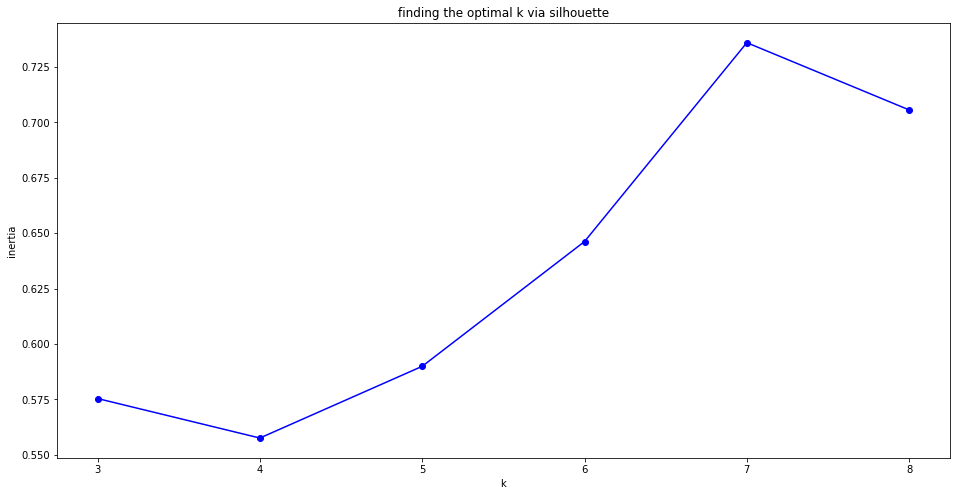

In [93]:
#plot the silhouette/distortion: 
plt.figure(figsize=(16,8))
plt.plot(K,silhouettes,'bo-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('finding the optimal k via silhouette');

# definition 
# 1 - clusters are well apart from eachother / clearly distinguishable 
# 0 - clusters are indifferent , distance between them is not significant 
# -1 - clusters are assigned incorrectly - there is merging of clusters 

# use the results 

In [ ]:
# re run k means with the right number of clusters 
# Add cluster label into your data frame 
# introduce new row (remember to use the same scaler! or go back to raw data )

In [97]:
arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [99]:
sian_state = {'Murder':2, 'Assault':46, 'UrbanPop':20, 'Rape':10}

In [98]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [100]:
# create a dataframe of our new row 
sian_state_df=pd.DataFrame.from_dict([sian_state])

In [101]:
sian_state_df

,Murder,Assault,UrbanPop,Rape
0,2,46,20,10


conceptual notes 
- MinMaxScaler.fit(old_data_df)# learning about that data 
- MinMaxScaler.transform(new_data_df)
- Kmeans.fit(old_data_df) # learnt 
- KMeans.predict(new_data_df)

In [108]:
#re run kmeans to fit to our old data frame (correct # of clusters )
kmeans=KMeans(n_clusters=7, random_state=5)
kmeans.fit(arrests)

KMeans(n_clusters=7, random_state=5)

In [109]:
kmeans.predict(sian_state_df)

array([2], dtype=int32)

In [110]:
c_new=2

In [111]:
arrests['cluster']=kmeans.labels_

In [113]:
arrests.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,5
Arkansas,8.8,190,50,19.5,6
California,9.0,276,91,40.6,4


### what state is like sian state ? 

In [117]:
arrests[arrests.cluster==2].sample(1)

,Murder,Assault,UrbanPop,Rape,cluster
West Virginia,5.7,81,39,9.3,2


In [115]:
sian_state_df

,Murder,Assault,UrbanPop,Rape
0,2,46,20,10


In [ ]:
# sian state is like west virginia ? 